# Lab session of Image Analysis
## BE 4. Mathematical Morphology
### Duration: 2h


**Instructions:** 
- Submit a single **notebook** for each group (up to two people per group) of the session.
- Name it **beX_name1_name2**, with **X** denoting the number of the lab session and **name1,2** your surnames.
- The notebook acts as a report for your work and has to contain both the **code**, your **outputs** (images, plots, etc.), and the **answers** to the theory question.
- Upload the notebook in the **Travaux** section on **Chamilo**, within the folder corresponding to the supervisor associated to this session. If you were already assigned a personal repository for your group, you can also upload this material through **git**.

**Deadline submission:** 
- The material should be submitted within a week from the lab work.

**Notes:**
- We allow either the `ipynb` or `pdf` file format (`File -> Download as -> pdf via LaTeX (.pdf)`).
- Please do not change the content of the cells other than those marked with `# To do` or `Answers: [To do]`.
- If you need an extra cell for your answers, you can add a new one by clicking on the left-side outline of your current cell and pressing `B`.
- If you need to type plain text, select `Markdown` from the dropdown menu above to change the cell type. 

**Objectives of this lab work:** 
- Get familiar with mathematical morphology operators
- Apply the morphological operators to real images for applications of object extraction

In [17]:
%%capture
%pip install -r requirements.txt
%matplotlib inline

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import morphology

images_folder = "images/"

### Image display utility functions
We provide some utility function for comparing images that you can use for convenience during the session.

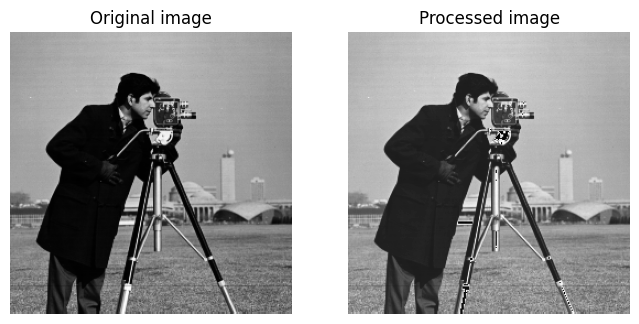

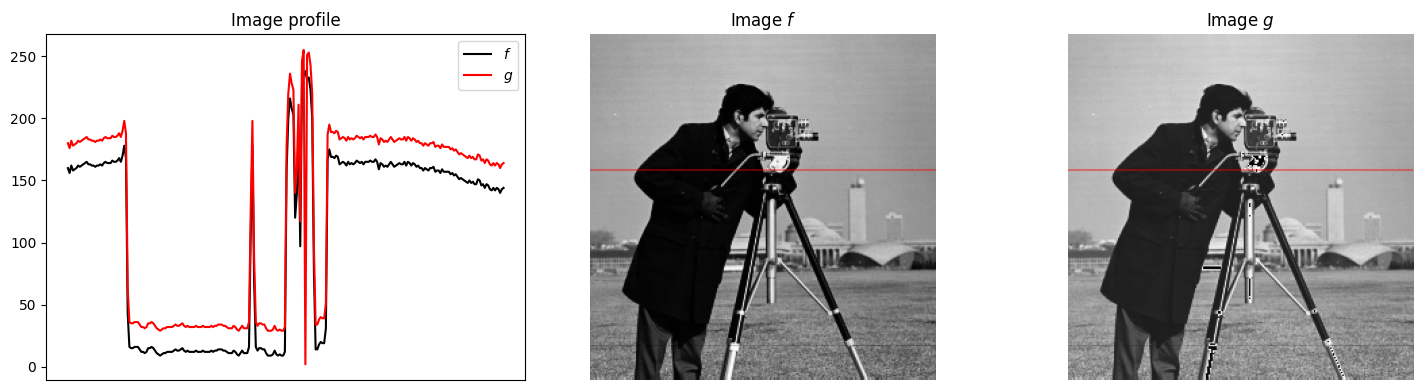

In [19]:
# Compare two images
def compare_images(image_original, image_processed, label=None):

    fig, ax = plt.subplots(
        ncols=2, figsize=(8, 4), sharex=True, sharey=True
    )
    ax[0].imshow(image_original, cmap="gray")
    ax[0].set_title('Original image')
    ax[0].axis('off')
    ax[1].imshow(image_processed, cmap="gray")
    if label is not None:
        ax[1].set_title(label)
    ax[1].axis('off')
    
# compare images, plotting an image profile
def compare_profiles(image_original, image_processed, y_slice=None):
    y_slice = image_processed.shape[0] // 2 if y_slice is None else y_slice

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    ax[0].plot(image_original[y_slice], 'k', label='$f$')
    ax[0].plot(image_processed[y_slice], 'r', label='$g$')
    #ax[0].set_ylim(-0.2, 2)
    ax[0].set_title('Image profile')
    ax[0].set_xticks([])
    ax[0].legend()

    ax[1].imshow(image_original, vmin=image_original.min(), vmax=image_original.max(), cmap='gray')
    ax[1].axhline(y_slice, color='r', alpha=0.4)
    ax[1].set_title('Image $f$')
    ax[1].axis('off')

    ax[2].imshow(image_processed, cmap='gray')
    ax[2].axhline(y_slice, color='r', alpha=0.4)
    ax[2].set_title('Image $g$')
    ax[2].axis('off')

    fig.tight_layout()
    plt.show()


# read an image
f = skimage.io.imread(images_folder + "camera.tif")

# Creates a dummy processed image and compare them
g = f+20
compare_images(f, g, "Processed image")

# Compare image f and g, plotting also a profile of the image at a given position yslice.
compare_profiles(f, g, y_slice=100)
    


# Morphologic operator tools

## Structuring elements
- Many operators defined in mathematical morphology involve neighborhood operations; in other words, the result of an operation over one pixel depends on the pixel values in its neighborhood. 
- The neighborhood is defined by a mask of given shape and size, called **structuring element** (SE).
- The library `scikit-image.morphology` provides various different standard shapes for the structuring elements.
- We show below a selection of structuring element, visualizing their associated mask.

In [20]:
# Generate a dictionary of bidimensional structuring elements.
struc_2d = {
    "square(15)": morphology.square(15),
    "rectangle(10, 15)": morphology.rectangle(10, 15),
    "diamond(7)": morphology.diamond(7),
    "disk(7)": morphology.disk(7),
    "octagon(7, 4)": morphology.octagon(7, 4),
    "star(5)": morphology.star(5)
}

# Visualize the elements.
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for idx, (title, struc) in enumerate(struc_2d.items()):
    x, y = idx // 3, idx % 3
    ax[x, y].imshow(struc, cmap="Paired", vmin=0, vmax=12)
    for i in range(struc.shape[0]):
        for j in range(struc.shape[1]):
            ax[x, y].text(j, i, struc[i, j], ha="center", va="center", color="w")
    ax[x, y].set_axis_off()
    ax[x, y].set_title(title)

fig.tight_layout()
plt.show()

## Morphological operators
The most common operations performed in morphology are listed below. In the following, $f$ denotes a generic image, $B$ denotes a structuring element, and $\overline{B}$ denotes its reflection (i.e., a rotation of $B$ of 180 degrees around its origin).
- Erosion $\epsilon_B(f)$: taking the lowest intensity value in the neighborhood of a pixel defined by $B$.
- Dilation $\delta_B(f)$: taking the highest intensity value in the neighborood of a pixel defined by $B$.
- Opening $\gamma_B (f)=\delta_{\overline{B}}~[\epsilon_B(f)]$.
- Closing $\phi_B (f)=\epsilon_{\overline{B}}~[\delta_B(f)]$.
- White Top Hat (Residues of an opening)  $WTH(f)=f - \gamma_B(f)$.
- Black Top Hat (Residues of a closing)  $BTH(f)=\phi_B( f ) - f$.

In the example below, we load the cameraman image and apply each operator to see the effect on the image.

In [22]:
f = skimage.io.imread(images_folder + "camera.tif")

structuring_element = morphology.square(3)
f_erosion = morphology.erosion(f, structuring_element)
f_dilation = morphology.dilation(f, structuring_element)
f_opening = morphology.opening(f, structuring_element)
f_closing = morphology.closing(f, structuring_element)
f_white_tophat = morphology.white_tophat(f, structuring_element)
f_black_tophat = morphology.black_tophat(f, structuring_element)

_, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[0, 0].imshow(f, cmap="gray")
ax[1, 0].imshow(f, cmap="gray")
ax[2, 0].imshow(f, cmap="gray")
ax[0, 1].imshow(f_erosion, cmap="gray")
ax[0, 2].imshow(f_dilation, cmap="gray")
ax[1, 1].imshow(f_opening, cmap="gray")
ax[1, 2].imshow(f_closing, cmap="gray")
ax[2, 1].imshow(f_white_tophat, cmap="gray")
ax[2, 2].imshow(f_black_tophat, cmap="gray")

ax[0, 0].set_title("Original")
ax[1, 0].set_title("Original")
ax[2, 0].set_title("Original")
ax[0, 1].set_title("Erosion")
ax[0, 2].set_title("Dilation")
ax[1, 1].set_title("Opening")
ax[1, 2].set_title("Closing")
ax[2, 1].set_title("White tophat")
ax[2, 2].set_title("Black tophat")

plt.show()


### _Laboratory activity_

**Exercise:**
- Change the shape and size of the structuring element and observe the effects that are produced in the image in the case of the erosion, dilation, opening, and closing.
- Compare the effects when using an isotropic (i.e., radially symmetric) structuring element such as a disk or square with respect to considering a directional structuring element (e.g., a rectangle)

**Question:**
- Describe briefly some possible toy examples, where the dilation and the erosion could be useful to process an image.

In [ ]:
# To do

### _Answers_:
[To do]

## Thresholding
There are two main techniques to perform an image thresholding:
- **Manual image thresholding**: with `f > t`, where `f` is the image and `t` the value of the threshold. 
- **Automatic thresholding**: The value of the thresold can also be computed automatically on the image. In this case the idea is that the estimated threshold "optimally" (with respect to some metric) separates the background from the image foreground. A well known example of this is the Otsu thresholding algorithm which aims at finding the threshold that separates the distribution of the pixels associated to the background to those of the foreground. It is assumed that the distribution of the background and foreground are relatively well separated.

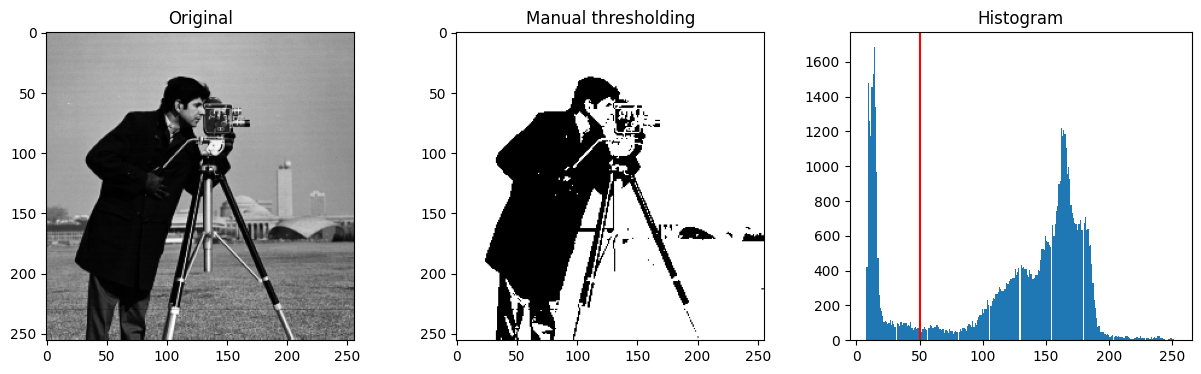

In [26]:
# Example of manual thresholding
threshold = 50
f_manual_thresholding = f > threshold

_, ax = plt.subplots(ncols=3, figsize=(15, 4))
ax[0].imshow(f, cmap="gray")
ax[1].imshow(f_manual_thresholding, cmap="gray")
ax[2].hist(f.ravel(), bins=256)
ax[2].axvline(threshold, color='r')
ax[0].set_title("Original")
ax[1].set_title("Manual thresholding")
ax[2].set_title('Histogram')

# Example of automatic thresholding (using the Otsu technique)
threshold = skimage.filters.threshold_otsu(f)
f_automatic_thresholding = f > threshold

_, ax = plt.subplots(ncols=3, figsize=(15, 4))
ax[0].imshow(f, cmap="gray")
ax[1].imshow(f_automatic_thresholding, cmap="gray")
ax[2].hist(f.ravel(), bins=256)
ax[2].axvline(threshold, color='r')
ax[0].set_title("Original")
ax[1].set_title("Automatic thresholding")
ax[2].set_title('Histogram')

plt.show()

## Other useful operators

**Median filtering**: 
- The operation returns the median value within the neighborhood of a pixel. The function `skimage.filters.median` allows to define this neighborhood through a structuring element.

**Image complement**:
- Association of each pixel of the image to its complement to the max value. For example in an 8-bit image $I$, the operation is equivalent to compute $255-I$, because the pixel intensity range is $[0, ..., 255]$.
This operation can be done in Python with the `~` operator (e.g., `f_neg = ~f`).

**Region Labeling**: 
- This operation allows to assign a label to all connected regions. In particular, the function `skimage.measure.label` takes as input a binary image (whose pixels are either 0 or 1) and assign an unique integer label to all regions of orthogonally connected 1-values.

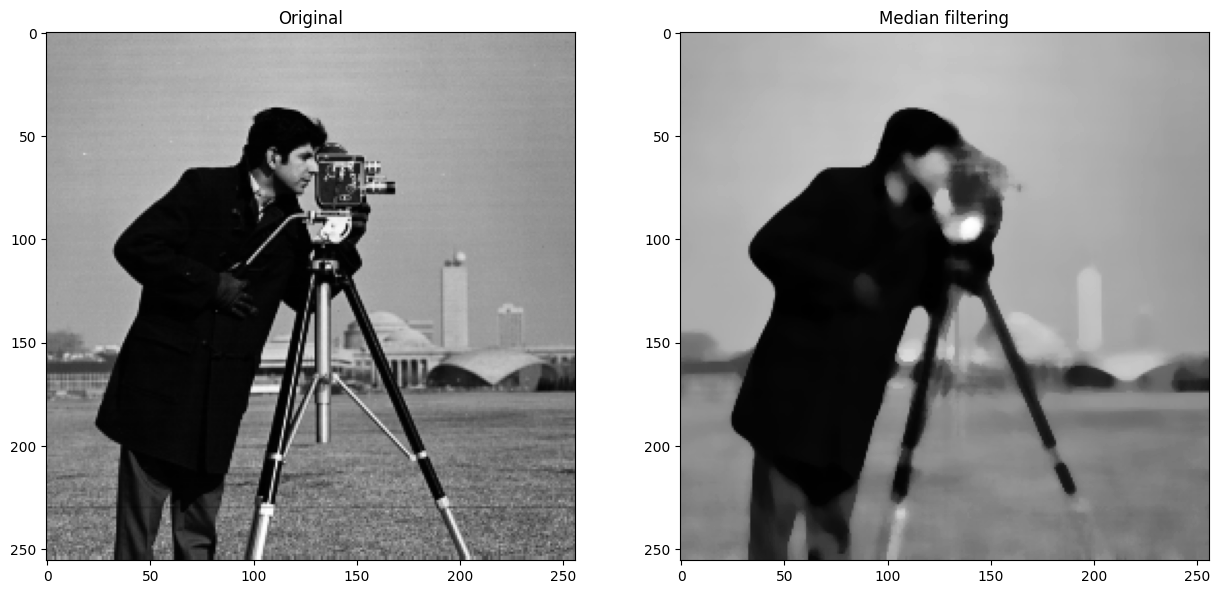

In [27]:
# Median filtering
structuring_element = morphology.disk(5)
f_median = skimage.filters.median(f, structuring_element)

_, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(f, cmap="gray")
ax[1].imshow(f_median, cmap="gray")
ax[0].set_title("Original")
ax[1].set_title("Median filtering")

# Image complement
f_complement_grayscale = ~f
f_complement_binary = ~f_automatic_thresholding

_, ax = plt.subplots(1, 4, figsize=(15, 8))
ax[0].imshow(f, cmap="gray")
ax[1].imshow(f_complement_grayscale, cmap="gray")
ax[2].imshow(f_automatic_thresholding, cmap="gray")
ax[3].imshow(f_complement_binary, cmap="gray")
ax[0].set_title("Original")
ax[1].set_title("Complement (Grayscale image)")
ax[2].set_title("Binary image")
ax[3].set_title("Complement (Binary image)")

# Region labeling (Each color corresponds to a region value)
image_coins = skimage.data.coins()[50:-50, 50:-50]
image_thresholding = image_coins > skimage.filters.threshold_otsu(image_coins)
image_labeled = skimage.measure.label(image_thresholding)

fig, ax = plt.subplots(1, 3, figsize=(15, 2.6))
ax[0].imshow(image_coins, cmap="gray")
ax[1].imshow(image_thresholding, cmap="gray")
cm = ax[2].imshow(image_labeled)
fig.colorbar(cm)

ax[0].set_title("Original")
ax[1].set_title("Thresholding")
ax[2].set_title("Region labeling")

plt.show()

# Morphological processing

### _Laboratory activity_

**Exercise (Extracting the tablets):**
- Open the image `tablets.png`
- Design an algorithm for extracting the tablets that is also able to detect that one tablet is missing. 
- In particular:
  - Generate a binary image with ones placed at the pixel positions belonging to a tablet.
  - Count the number of regions in the image (e.g., using `label`) in order to estimate the number of tablets.
- *Hint*: Define a sequence of operations based on image thresholding (the threshold value can be defined manually) to isolate the tablets and post-process it to remove spurious regions. 

**Question:**
- Describe which morphological operator is the most suitable for this operation and why you chose the particular shape and size for the structuring element.

In [ ]:
# To do

### _Answers_:
[To do]

### _Laboratory activity_

**Exercise (Broken cookies):**
- Open the image `cookies_broken.png`
- Reduce it to 1/4-th its length and width 
    - *Hint*: Use `skimage.transform.resize(image, (image.shape[0] // 4, image.shape[1] // 4), anti_aliasing=True)`
- Create an algorithm to detect the regions associated to the broken cookies in the image.
    - *Hint*: Exploit the characteristic of broken cookies being slightly smaller than the rest.
- **Optional**: Find the centroid coordinates of the broken cookies. 
    - *Hint*: Use `skimage.measure.regionprops`

In [ ]:
# To do

### _Laboratory activity_

**Exercise (Area of chocolates):**
- Open the image `chocos.jpg`
- Design an algorithm to count and estimate the average area (in number of pixels) of the chocolates in the box (dark nuggets).
- The algorithm may have the following steps:
    - Extract the chocolates, by processing the image in order to derive a binary image showing the objects of interest.
    - Pay attention to properly remove the grid.
    - Use `skimage.measure.label` to label the regions, paying attention that the background is set to the index 0.
    - Exploit this image to compute the average area of the chocolates.

In [ ]:
# To do

### _Laboratory activity_

**Exercise (Caps of bottles):**
- Open the image `bottles.png`
- Design an algorithm for extracting the caps of the bottles
- Requested output: a binary image with ones at the pixels belonging to the caps.
    - *Hint*: The caps have similar graylevels and similar size to the box and the caps cannot be separated according to the pixel intensities. Exploit the fact that the caps and box have different shapes.
- Note: The resulting image should also detect the loose caps not attached to any bottle.

In [ ]:
# To do

### _Laboratory activity_

**Exercise (Retina):**

- Load the image `retina.png`.
- Define an algorithm to extract the optical nerve (the bright blob at the upper right corner of the image).
- Enhance the original image by improving its contrast (Parts of the image close to the borders are darker, we want them to be closer in brightness to the rest of the image).
    - *Hint*: You can first estimate the background of the image and you will then subtract it to the original image. (In order to avoid saturation, cast the image to `float` before subtraction.)
- **Optional:** Extract the vessel network.


In [ ]:
# To do